In [ ]:
import os
import cv2
import sys
import numpy as np
from os import listdir
from imutils import paths
from os.path import isfile, join
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(1337)  # for reproducibility

Using TensorFlow backend.


In [ ]:
!git clone #cloning into repo

Cloning into 'ml-wood-my'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 552 (delta 12), reused 20 (delta 7), pack-reused 523
Receiving objects: 100% (552/552), 661.60 MiB | 57.53 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Checking out files: 100% (348/348), done.


In [ ]:
sys.path.append('ml-wood-my')
import img_preprocess2
import toTest_Model
import toTest_Model3

In [ ]:
def showImage(img):
  test_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  test_img = cv2.resize(test_img, (500, 500))
  cv2_imshow(test_img)

In [ ]:
img_rows, img_cols = 50, 50 # input image dimensions
#folder_list = ['batch1', 'batch2', 'batch3', 'batch4']
#folder_list = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5'] # add batch2, batch3, for more species
#folder_list = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6']
folder_list = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'batch7']

folder_list = toTest_Model3.getAllImagesSorted(folder_list)
folder_list

#check = toTest_Model.getListInsideFolder('batch1')
#check

['bakau',
 'belian',
 'bintangor',
 'chengal',
 'darkredmeranti',
 'durian',
 'geronggang',
 'gerutu',
 'giam',
 'jelutong',
 'kapur',
 'kasai',
 'kayumalam',
 'kedondong',
 'kekatong',
 'kelat',
 'keledang',
 'kempas',
 'keruing',
 'kulim',
 'kungkur',
 'machang',
 'malayankauri',
 'mataulat',
 'medang',
 'melantai',
 'melunak',
 'mempening',
 'mempisang',
 'mengkulang',
 'meransi',
 'merantibakau',
 'merbau',
 'merpauh',
 'nyatoh',
 'penarahan',
 'perupok',
 'petai',
 'pulai',
 'punah',
 'ramin',
 'redseraya',
 'rengas',
 'rengas',
 'resak',
 'rubberwood',
 'sepetir',
 'sesendok',
 'tembusu',
 'terap',
 'tualang',
 'whitemeranti',
 'whiteseraya',
 'yellowmeranti',
 'yellowseraya']

In [ ]:
#from glob import glob
#class_name = glob("ml-wood-my/batch*/*")
#class_name = class_name.sort()
#class_name

In [ ]:
X, y = img_preprocess2.prep_total_pipeline(folder_list, img_rows) #limit=None
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

ml-wood-my/batch1/durian
Num pics in folder: 2
All images being used
X shape: (4800, 50, 50, 3) -=-=-=-= y shape: (4800,)
ml-wood-my/batch1/punah
Num pics in folder: 2
All images being used
X shape: (9600, 50, 50, 3) -=-=-=-= y shape: (9600,)
ml-wood-my/batch1/bintangor
Num pics in folder: 2
All images being used
X shape: (14400, 50, 50, 3) -=-=-=-= y shape: (14400,)
ml-wood-my/batch1/machang
Num pics in folder: 2
All images being used
X shape: (19200, 50, 50, 3) -=-=-=-= y shape: (19200,)
ml-wood-my/batch1/whitemeranti
Num pics in folder: 2
All images being used
X shape: (24000, 50, 50, 3) -=-=-=-= y shape: (24000,)
ml-wood-my/batch1/tembusu
Num pics in folder: 2
All images being used
X shape: (28800, 50, 50, 3) -=-=-=-= y shape: (28800,)
ml-wood-my/batch1/nyatoh
Num pics in folder: 4
All images being used
X shape: (38400, 50, 50, 3) -=-=-=-= y shape: (38400,)
ml-wood-my/batch1/merpauh
Num pics in folder: 2
All images being used
X shape: (43200, 50, 50, 3) -=-=-=-= y shape: (43200,)
m

In [ ]:
batch_size = 100
num_classes = len(folder_list)
num_epochs = 10
nb_filters = 32 # number of convolutional filters to use
pool_size = (2, 2) # size of pooling area for max pooling
                   # decreases image size, and helps to avoid overfitting

In [ ]:
if K.image_dim_ordering() == 'th':
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[3], img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[3], img_rows, img_cols)
  input_shape = (X_test.shape[3], img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, X_train.shape[3])
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, X_test.shape[3])
  input_shape = (img_rows, img_cols, X_test.shape[3])

In [ ]:
# don't change conversion or normalization
X_train = X_train.astype('float32') # data was uint8 [0-255]
X_test = X_test.astype('float32')  # data was uint8 [0-255]
X_train /= 255 # normalizing (scaling from 0 to 1)
X_test /= 255  # normalizing (scaling from 0 to 1)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validate samples')

('X_train shape:', (100800, 50, 50, 3))
(100800, 'train samples')
(33600, 'test samples')
(33600, 'validate samples')


In [ ]:
# convert class vectors to binary class matrices (don't change)
Y_train = np_utils.to_categorical(y_train, num_classes) # cool
Y_test = np_utils.to_categorical(y_test, num_classes)   # cool * 2
Y_val = np_utils.to_categorical(y_val, num_classes)   # cool * 2

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
#num_epochs = 10

In [ ]:
#K.clear_session()

In [ ]:
#batch_size = 100

In [ ]:
K.clear_session()
model = Sequential()
model.add(Convolution2D(nb_filters, (5, 5), strides=(1, 1), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

#model.add(Activation('relu'))
model.add(Convolution2D(nb_filters*2, (3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

#model.add(Convolution2D(nb_filters, (3, 3)))
#model.add(Activation('relu'))

#model.add(Activation('tanh'))
model.add(Convolution2D(nb_filters*3, (2, 2), strides=(2, 2), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))

model.add(Activation('tanh'))
model.add(Dropout(0.15))

#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dropout(0.15))

model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# during fit process watch train and test error simultaneously
model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_data=(X_val, Y_val))

print('////////////////////////////////////////////////////////////////////////////////////////////')

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

W0619 01:22:13.001137 139646363518848 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0619 01:22:13.004431 139646363518848 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0619 01:22:13.053482 139646363518848 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 01:22:13.055952 139646363518848 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W061

Train on 100800 samples, validate on 33600 samples
Epoch 1/10
100800/100800 [==============================] - 20s 198us/step - loss: 1.6029 - acc: 0.4535 - val_loss: 7.6967 - val_acc: 0.0427
Epoch 2/10
100800/100800 [==============================] - 12s 122us/step - loss: 0.8568 - acc: 0.6939 - val_loss: 8.9459 - val_acc: 0.0370
Epoch 3/10
100800/100800 [==============================] - 12s 123us/step - loss: 0.6701 - acc: 0.7614 - val_loss: 8.7954 - val_acc: 0.0488
Epoch 4/10
100800/100800 [==============================] - 12s 123us/step - loss: 0.5400 - acc: 0.8064 - val_loss: 9.1071 - val_acc: 0.0403
Epoch 5/10
100800/100800 [==============================] - 12s 124us/step - loss: 0.4916 - acc: 0.8220 - val_loss: 9.7305 - val_acc: 0.0533
Epoch 6/10
100800/100800 [==============================] - 12s 124us/step - loss: 0.4329 - acc: 0.8437 - val_loss: 9.9728 - val_acc: 0.0494
Epoch 7/10
100800/100800 [==============================] - 12s 124us/step - loss: 0.4183 - acc: 0.8497

In [ ]:
# 4 batch
#Test score:    0.2112177508448561
#Test accuracy: 0.9261309523809523

# 5 batch
# Test score:    0.2491780699022633
# Test accuracy: 0.9125

# 6 batch
# Test score:    0.27755179950479597
# Test accuracy: 0.9017113095238095

In [ ]:
#folder = "ml-wood-my/"

In [ ]:
#toTest_Model.getImagePredict(image, folder, model)

In [ ]:
import h5py

In [ ]:
model.save('model_4batch.h5')

In [ ]:
folderr = ['batch1', 'batch2', 'batch3', 'batch4']
sort = toTest_Model3.getAllImagesSorted(folderr)
len(sort)

32

In [ ]:
np.save('batch4', sort)

In [ ]:
pred = model.predict_classes(X_test)

12
12.0
melantai


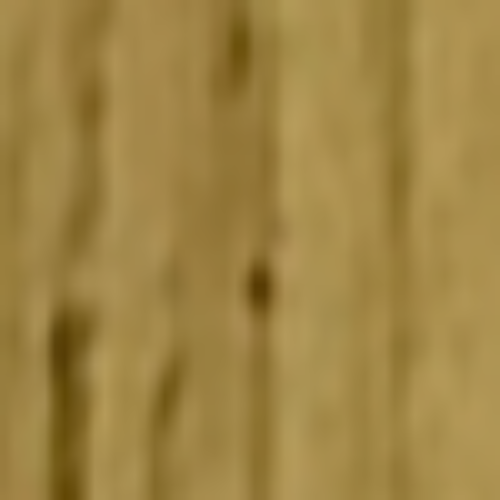

In [ ]:
num = 100
print(pred[num])
print(y_test[num])
print(sort[pred[num]])
showImage(X_test[num]*255)

In [ ]:
len(X_test)

33600